## Contributors
### Jay Upadhyay
### Haruki Miyazaki
###
###
###

# Libraries

In [3516]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
import seaborn as sns

In [3517]:
df_orig=pd.read_csv("adult.csv")
df_orig.dropna(inplace=True)
df_orig

,Age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# 1. Project Proposal


We pulled the data from https://archive-beta.ics.uci.edu/dataset/2/adult .

# 2. Data Collection and data cleaning


## Changing workclass to numeric

In [3518]:
workclass_list = list(sorted(set(df_orig[" workclass"])))

for i,x in enumerate(workclass_list):
    print(i,":", x)
    
df_orig[' workclass'].replace(workclass_list,
                        range(len(workclass_list)), inplace=True)

0 :  ?
1 :  Federal-gov
2 :  Local-gov
3 :  Never-worked
4 :  Private
5 :  Self-emp-inc
6 :  Self-emp-not-inc
7 :  State-gov
8 :  Without-pay


## Changing Education to Numeric

In [3519]:
df_orig['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [3520]:
education_list=[ ' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th',' 11th',' 12th',' HS-grad',
                              ' Assoc-voc',' Assoc-acdm',' Some-college',' Bachelors', ' Masters',
                              ' Prof-school' ,' Doctorate']

df_orig['education'].replace(education_list,
                        range(16), inplace=True)

df_orig
for x in range(16):
    print(x,":", education_list[x])

0 :  Preschool
1 :  1st-4th
2 :  5th-6th
3 :  7th-8th
4 :  9th
5 :  10th
6 :  11th
7 :  12th
8 :  HS-grad
9 :  Assoc-voc
10 :  Assoc-acdm
11 :  Some-college
12 :  Bachelors
13 :  Masters
14 :  Prof-school
15 :  Doctorate


#### Note. I want to come back to this and bin it into appropriate 
I also chose to exclude this for now because I believe education-num already represents it numerically.

## Changing marital status to numeric

In [3521]:
marital_list = list(sorted(set(df_orig["marital-status"])))

for i,x in enumerate(marital_list):
    print(i,":", x)

df_orig['marital-status'].replace(marital_list,
                        range(len(marital_list)), inplace=True)

0 :  Divorced
1 :  Married-AF-spouse
2 :  Married-civ-spouse
3 :  Married-spouse-absent
4 :  Never-married
5 :  Separated
6 :  Widowed


## Occupation

I don't like the ? mark section.

In [3522]:
occupation_list = list(sorted(set(df_orig["occupation"])))

for i,x in enumerate(occupation_list):
    print(i,":", x)

df_orig['occupation'].replace(occupation_list,
                        range(len(occupation_list)), inplace=True)

0 :  ?
1 :  Adm-clerical
2 :  Armed-Forces
3 :  Craft-repair
4 :  Exec-managerial
5 :  Farming-fishing
6 :  Handlers-cleaners
7 :  Machine-op-inspct
8 :  Other-service
9 :  Priv-house-serv
10 :  Prof-specialty
11 :  Protective-serv
12 :  Sales
13 :  Tech-support
14 :  Transport-moving


## Relationship conversion to numeric

I don't like other relative section here.


In [3523]:
relationship_list = list(sorted(set(df_orig["relationship"])))

for i,x in enumerate(relationship_list):
    print(i,":", x)

df_orig['relationship'].replace(relationship_list,
                        range(len(relationship_list)), inplace=True)

0 :  Husband
1 :  Not-in-family
2 :  Other-relative
3 :  Own-child
4 :  Unmarried
5 :  Wife


## Race conversion to numeric


In [3524]:
race_list = list(sorted(set(df_orig["race"])))

for i,x in enumerate(race_list):
    print(i,":", x)

df_orig['race'].replace(race_list,
                        range(len(race_list)), inplace=True)

0 :  Amer-Indian-Eskimo
1 :  Asian-Pac-Islander
2 :  Black
3 :  Other
4 :  White


## Sex conversion to numeric

In [3525]:
sex_list = list(sorted(set(df_orig["sex"])))

for i,x in enumerate(sex_list):
    print(i,":", x)

df_orig['sex'].replace(sex_list,
                        range(len(sex_list)), inplace=True)

0 :  Female
1 :  Male


## Country to Numeric

In [3526]:
# Changing a column "class" to be 0:<=50K and 1:>50K
country_list = list(sorted(set(df_orig["native-country"])))

for i,x in enumerate(country_list):
    print(i,":", x)

df_orig['native-country'].replace(country_list,
                        range(len(country_list)), inplace=True)

0 :  ?
1 :  Cambodia
2 :  Canada
3 :  China
4 :  Columbia
5 :  Cuba
6 :  Dominican-Republic
7 :  Ecuador
8 :  El-Salvador
9 :  England
10 :  France
11 :  Germany
12 :  Greece
13 :  Guatemala
14 :  Haiti
15 :  Holand-Netherlands
16 :  Honduras
17 :  Hong
18 :  Hungary
19 :  India
20 :  Iran
21 :  Ireland
22 :  Italy
23 :  Jamaica
24 :  Japan
25 :  Laos
26 :  Mexico
27 :  Nicaragua
28 :  Outlying-US(Guam-USVI-etc)
29 :  Peru
30 :  Philippines
31 :  Poland
32 :  Portugal
33 :  Puerto-Rico
34 :  Scotland
35 :  South
36 :  Taiwan
37 :  Thailand
38 :  Trinadad&Tobago
39 :  United-States
40 :  Vietnam
41 :  Yugoslavia


## Income to numeric

In [3527]:
# Changing a column "class" to be 0:<=50K and 1:>50K
class_list = list(sorted(set(df_orig["class"])))

for i,x in enumerate(class_list):
    print(i,":", x)
    
df_orig['class'].replace(class_list,
                        range(len(class_list)), inplace=True)

0 :  <=50K
1 :  >50K


In [3528]:
df_orig

,Age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,7,77516,12,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,12,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,8,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,6,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,12,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,10,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,154374,8,9,2,7,0,4,1,0,0,40,39,1
32558,58,4,151910,8,9,6,1,4,4,0,0,0,40,39,0
32559,22,4,201490,8,9,4,1,3,4,1,0,0,20,39,0


## Correlation Matrix

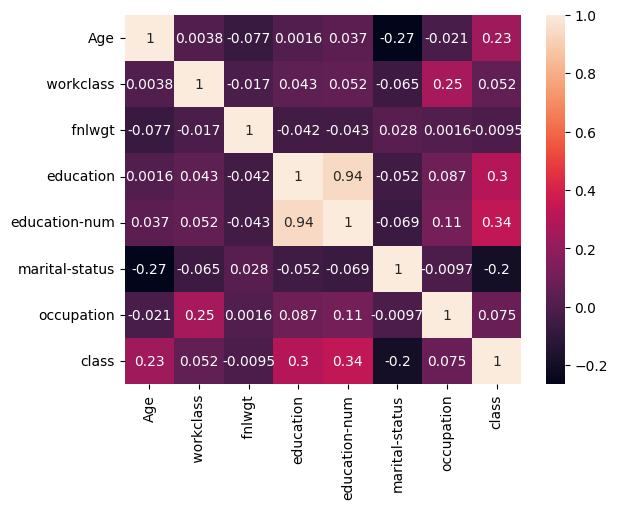

In [3529]:

df_small = df_orig.iloc[:,[0,1,2,3,4,5,6,14]]
correlation_mat = df_small.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()




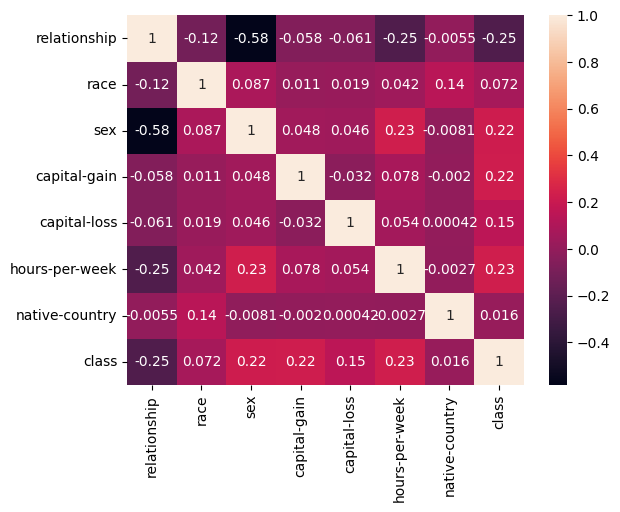

In [3530]:
df_small = df_orig.iloc[:,[7,8,9,10,11,12,13,14]]
correlation_mat = df_small.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()


We see that age, education, marital status, relationship, sex, capital gain, capital loss, hours per week are all correlated to class(our income variable). The rest are relatively low so ignored for now.


# 3. EDA

# 4. Techniques Used

## KNN First Attempt

In [3531]:
# Splits rows to create a train and test
train,test=train_test_split(df_orig.iloc[:,[4,8,9,14]],test_size=0.33)
#train,test=train_test_split(df_orig.iloc[:,[0,1,4,5,6,7,8,9,12,13,14]],test_size=0.33)
X_train=train.iloc[:,:3] #Take train portion and first columns
Y_train=train.iloc[:,3:].values.ravel() #target we are trying to predict for
X_test=test.iloc[:,:3] #take test portion columns 
Y_test=test.iloc[:,3:].values.ravel()


In [3532]:
knn=KNeighborsClassifier(
    n_neighbors=80, 
    weights='uniform', 
    algorithm='auto', 
    leaf_size=30, 
    p=2, 
    #metric='matching', 
    metric='minkowski', 
    metric_params=None, 
    n_jobs=None)

In [3533]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=80)

In [3534]:
pred_test=knn.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, pred_test))
print("Precision:",metrics.precision_score(Y_test, pred_test))

Accuracy: 0.7780569514237856
Precision: 0.6875891583452212


Text(0.5, 1.0, '2-class Precision-Recall curve')

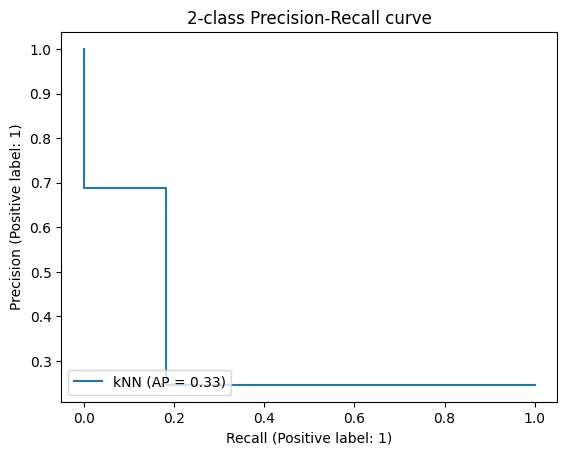

In [3535]:
display = metrics.PrecisionRecallDisplay.from_predictions(Y_test, pred_test, name="kNN")
display.ax_.set_title("2-class Precision-Recall curve")

In [3536]:
precision, recall, thresholds = metrics.precision_recall_curve(Y_test,pred_test)
precision

array([0.24641727, 0.68758916, 1.        ])

In [3537]:
metrics.roc_curve(Y_test,pred_test)

(array([0.        , 0.02704371, 1.        ]),
 array([0.        , 0.18202417, 1.        ]),
 array([2, 1, 0]))

## Second Attempt Random Forest 



In [3538]:
# Splits rows to create a train and test
#0,4,7,9,10,11,12
#0,1,3,5,6,7,8,9,12,13,14 DO NOT DELETE, CAN USE THIS LATER FOR IMAGE/SLIDES
#[0,1,4,6,7,8,9,10,11,12,14]] 85%
#168
train,test=train_test_split(df_orig.iloc[:,[0,1,4,6,7,8,9,10,11,12,14]],test_size=0.2)
X_train=train.iloc[:,:10].to_numpy() #Take train portion and first columns
Y_train=train.iloc[:,10:].values.ravel() #target we are trying to predict for
X_test=test.iloc[:,0:10].to_numpy()#take test portion columns 
Y_test=test.iloc[:,10:].values.ravel()

In [3539]:
rf = RandomForestClassifier(n_estimators=100,
                            # criterion='gini', 
                            max_depth=None, 
                            # min_samples_split=2, 
                            # min_samples_leaf=1, 
                            # min_weight_fraction_leaf=0.0,
                            # max_features='sqrt',
                            # max_leaf_nodes=None, 
                            # min_impurity_decrease=0.0, 
                            # bootstrap=True, 
                            # oob_score=False, 
                            # n_jobs=None, 
                            # random_state=None, 
                            # verbose=0,
                            # warm_start=False, 
                            # class_weight=None,
                            # ccp_alpha=0.0, 
                            # max_samples=None
                            )
rf.fit(X_train,Y_train)


RandomForestClassifier()

In [3540]:
pred_test=rf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, pred_test))
print("Precision:",metrics.precision_score(Y_test, pred_test))

Accuracy: 0.8461538461538461
Precision: 0.7130434782608696


# 5. Data Processing Part 2

In [3541]:
df_features=df_orig.iloc[:,[0,1,4,6,7,8,9,10,11,12,14]].copy()
df_features

,Age,workclass,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,class
0,39,7,13,1,1,4,1,2174,0,40,0
1,50,6,13,4,0,4,1,0,0,13,0
2,38,4,9,6,1,4,1,0,0,40,0
3,53,4,7,6,0,2,1,0,0,40,0
4,28,4,13,10,5,2,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,12,13,5,4,0,0,0,38,0
32557,40,4,9,7,0,4,1,0,0,40,1
32558,58,4,9,1,4,4,0,0,0,40,0
32559,22,4,9,1,3,4,1,0,0,20,0


In [3542]:
#max(normalize( df_features["capital-gain"].to_numpy().reshape(1,-1)))
#scaler=StandardScaler()
##scaler.fit()
#scaler.fit_transform(df_features["capital-gain"].to_numpy().reshape(1,-1)).reshape(df_features["capital-gain"].shape)
#scaler.fit_transform(X_train.reshape(-1,X_train.shape[-1])).reshape(X_train.shape)
#df_features

#df_features[["capital-gain", "capital-loss"]] = StandardScaler.fit_transform(X=df_features[["capital-gain", "capital-loss"]],y=df_features[["capital-gain", "capital-loss"]])
df_features[["capital-gain"]]=df_features[["capital-gain"]].astype(float)
df_features[["capital-loss"]]=df_features[["capital-loss"]].astype(float)
# Min-Max Normalization

cap_gain= df_features[["capital-gain", "capital-loss"]] 

df_features=df_features.drop("capital-gain", axis=1)
df_features=df_features.drop("capital-loss", axis=1)
#df_features.drop("capital-loss", axis=1)
df_norm = (cap_gain-cap_gain.min())/(cap_gain.max()-cap_gain.min())
df_features = pd.concat((df_norm, df_features), 1)
 
# print("Scaled Dataset Using Pandas")
# df_norm.head()

df_features 

/var/folders/f7/6q2gs3hx31j0br5ckpz40k940000gn/T/com.apple.shortcuts.mac-helper/ipykernel_37188/101562951.py:19: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_features = pd.concat((df_norm, df_features), 1)


,capital-gain,capital-loss,Age,workclass,education-num,occupation,relationship,race,sex,hours-per-week,class
0,0.021740,0.0,39,7,13,1,1,4,1,40,0
1,0.000000,0.0,50,6,13,4,0,4,1,13,0
2,0.000000,0.0,38,4,9,6,1,4,1,40,0
3,0.000000,0.0,53,4,7,6,0,2,1,40,0
4,0.000000,0.0,28,4,13,10,5,2,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,0.000000,0.0,27,4,12,13,5,4,0,38,0
32557,0.000000,0.0,40,4,9,7,0,4,1,40,1
32558,0.000000,0.0,58,4,9,1,4,4,0,40,0
32559,0.000000,0.0,22,4,9,1,3,4,1,20,0


In [3543]:
df_features.insert(loc=9, column='loss/gain', value=0)
df_features['loss/gain'] = np.where(((df_features['capital-loss']==0) & (df_features['capital-gain']==0)), 0, 1)
df_features

,capital-gain,capital-loss,Age,workclass,education-num,occupation,relationship,race,sex,loss/gain,hours-per-week,class
0,0.021740,0.0,39,7,13,1,1,4,1,1,40,0
1,0.000000,0.0,50,6,13,4,0,4,1,0,13,0
2,0.000000,0.0,38,4,9,6,1,4,1,0,40,0
3,0.000000,0.0,53,4,7,6,0,2,1,0,40,0
4,0.000000,0.0,28,4,13,10,5,2,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.000000,0.0,27,4,12,13,5,4,0,0,38,0
32557,0.000000,0.0,40,4,9,7,0,4,1,0,40,1
32558,0.000000,0.0,58,4,9,1,4,4,0,0,40,0
32559,0.000000,0.0,22,4,9,1,3,4,1,0,20,0


In [3544]:
df_features.insert(loc=10, column='Age Group', value=0)
df_features['Age Group'] = pd.cut(
    df_features['Age'], 
    [0,29, 44, 60,100], 
    labels=[0, 1,2,3]
)
df_features["Age Group"]=pd.to_numeric(df_features["Age Group"])


In [3545]:
tmpdf=pd.get_dummies(df_features.relationship,prefix="relationship")
tmpdf
df_features = pd.concat((tmpdf, df_features), 1)

/var/folders/f7/6q2gs3hx31j0br5ckpz40k940000gn/T/com.apple.shortcuts.mac-helper/ipykernel_37188/1147930876.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_features = pd.concat((tmpdf, df_features), 1)


In [3546]:
tmpdf=pd.get_dummies(df_features.race,prefix="race")
tmpdf
df_features = pd.concat((tmpdf, df_features), 1)

/var/folders/f7/6q2gs3hx31j0br5ckpz40k940000gn/T/com.apple.shortcuts.mac-helper/ipykernel_37188/2838776390.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_features = pd.concat((tmpdf, df_features), 1)


In [3547]:
df_features

,race_0,race_1,race_2,race_3,race_4,relationship_0,relationship_1,relationship_2,relationship_3,relationship_4,...,workclass,education-num,occupation,relationship,race,sex,loss/gain,Age Group,hours-per-week,class
0,0,0,0,0,1,0,1,0,0,0,...,7,13,1,1,4,1,1,1,40,0
1,0,0,0,0,1,1,0,0,0,0,...,6,13,4,0,4,1,0,2,13,0
2,0,0,0,0,1,0,1,0,0,0,...,4,9,6,1,4,1,0,1,40,0
3,0,0,1,0,0,1,0,0,0,0,...,4,7,6,0,2,1,0,2,40,0
4,0,0,1,0,0,0,0,0,0,0,...,4,13,10,5,2,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,0,1,0,0,0,0,0,...,4,12,13,5,4,0,0,0,38,0
32557,0,0,0,0,1,1,0,0,0,0,...,4,9,7,0,4,1,0,1,40,1
32558,0,0,0,0,1,0,0,0,0,1,...,4,9,1,4,4,0,0,2,40,0
32559,0,0,0,0,1,0,0,0,1,0,...,4,9,1,3,4,1,0,0,20,0


In [3548]:
# df_features=df_features.drop("capital-gain", axis=1)
df_features=df_features.drop("relationship_2", axis=1)
df_features=df_features.drop("race_0", axis=1)
df_features=df_features.drop("race_1", axis=1)
df_features=df_features.drop("race_3", axis=1)
# df_features=df_features.drop("capital-loss", axis=1)
# df_features=df_features.drop("sex", axis=1)
df_features=df_features.drop("Age", axis=1)
df_features=df_features.drop("occupation", axis=1)
df_features=df_features.drop("race", axis=1)
df_features=df_features.drop("relationship", axis=1)


We want to modify these values and see if we can increase correlation. 
We employ methods such as normalization and binning.

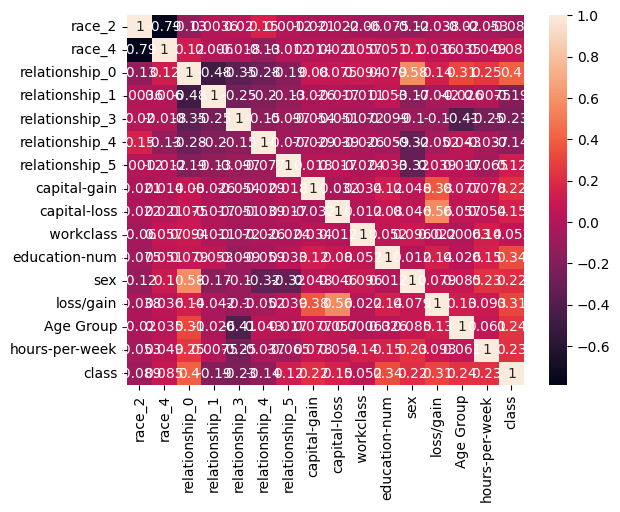

In [3549]:
df_small = df_features.iloc[:,:]

correlation_mat = df_small.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()


## Models Round 2

In [3550]:

train,test=train_test_split(df_features,test_size=0.2)
X_train=train.iloc[:,:15].to_numpy() #Take train portion and first columns
Y_train=train.iloc[:,15:].values.ravel() #target we are trying to predict for
X_test=test.iloc[:,0:15].to_numpy()#take test portion columns 
Y_test=test.iloc[:,15:].values.ravel()
rf = RandomForestClassifier(n_estimators=100,
                            # criterion='gini', 
                            max_depth=None, 
                            # min_samples_split=2, 
                            # min_samples_leaf=1, 
                            # min_weight_fraction_leaf=0.0,
                            # max_features='sqrt',
                            # max_leaf_nodes=None, 
                            # min_impurity_decrease=0.0, 
                            # bootstrap=True, 
                            # oob_score=False, 
                            # n_jobs=None, 
                            # random_state=None, 
                            # verbose=0,
                            # warm_start=False, 
                            # class_weight=None,
                            # ccp_alpha=0.0, 
                            # max_samples=None
                            )
rf.fit(X_train,Y_train)
pred_test=rf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, pred_test))
print("Precision:",metrics.precision_score(Y_test, pred_test))
#.85659450
#0.8588975894365116 after removing age

Accuracy: 0.8441578381698143
Precision: 0.7226001511715797


Text(0.5, 0, 'Random Forest Feature Importance')

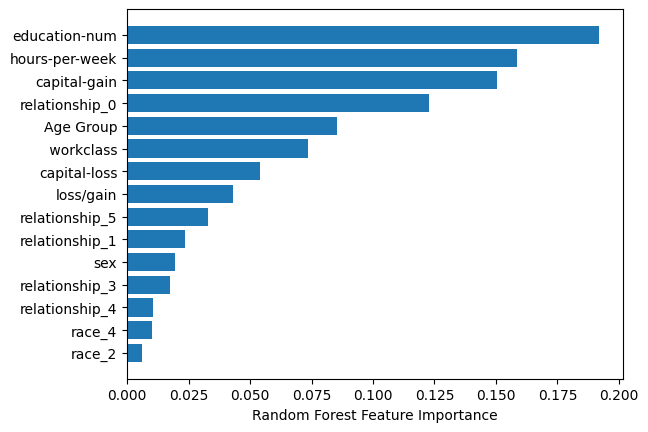

In [3551]:
indexes = rf.feature_importances_.argsort()
plt.barh(df_features.columns[indexes], rf.feature_importances_[indexes])
plt.xlabel("Random Forest Feature Importance")

# 6. Project Proposal